In [129]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(["science", "grid"])
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
textwidth = 3.31314
aspect_ratio = 6/8
scale = 2.0
width = textwidth * scale
height = width * aspect_ratio
dpi = 150

In [130]:
# Create table of all LM eval results
folder = "lm_eval_results"
# Each model has a seperate json file for lm eval results. Dict for model name: file name
model_files = {
    "Pythia-160M": "base_results.json",
    "Pythia-160M-GQA-48": "gqa_48_results.json",
    "Pythia-160M-MLKV-48": "mlkv_48_results.json",
    "Pythia-160M-MQA-12": "mqa_12_results.json",
    "Pythia-160M-MLKV-12": "mlkv_12_results.json",
    "Pythia-160M-MLKV-2": "mlkv_2_results.json",
}
# Each json has a 'result' key with each item being the dict of the result on a benchmark
# Read and put them in a dataframe with columns: model, benchmark1, benchmark2, ...
data = {
    'model': [],
}

for model, file in model_files.items():
    data['model'].append(model)
    json_file = json.load(open(f"{folder}/{file}"))
    for benchmark, result in json_file['results'].items():
        if benchmark not in data:
            data[benchmark] = []
        if benchmark == 'wikitext':
            data[benchmark].append(result['word_perplexity,none'])
        else:
            data[benchmark].append(result['acc,none'])

eval_df = pd.DataFrame(data)
eval_df

,model,arc_challenge,arc_easy,lambada_openai,logiqa,piqa,sciq,wikitext,winogrande,wsc
0,Pythia-160M,0.203072,0.439394,0.335921,0.219662,0.614255,0.725,33.715107,0.519337,0.365385
1,Pythia-160M-GQA-48,0.194539,0.419192,0.293809,0.195084,0.607726,0.686,97.685945,0.513023,0.365385
2,Pythia-160M-MLKV-48,0.182594,0.421296,0.261789,0.213518,0.599565,0.689,143.194767,0.495659,0.375000
3,Pythia-160M-MQA-12,0.189420,0.401936,0.267417,0.222734,0.610990,0.697,97.308139,0.503552,0.365385
4,Pythia-160M-MLKV-12,0.186860,0.410774,0.234427,0.205837,0.602829,0.703,48.595891,0.504341,0.365385
5,Pythia-160M-MLKV-2,0.181741,0.409091,0.220260,0.231951,0.594668,0.647,74.467232,0.522494,0.365385


In [131]:
# Add average accuracy (exclude wikitext)
eval_df['average_acc'] = eval_df.drop(columns=['model','wikitext']).mean(axis=1)
eval_df

,model,arc_challenge,arc_easy,lambada_openai,logiqa,piqa,sciq,wikitext,winogrande,wsc,average_acc
0,Pythia-160M,0.203072,0.439394,0.335921,0.219662,0.614255,0.725,33.715107,0.519337,0.365385,0.427753
1,Pythia-160M-GQA-48,0.194539,0.419192,0.293809,0.195084,0.607726,0.686,97.685945,0.513023,0.365385,0.409345
2,Pythia-160M-MLKV-48,0.182594,0.421296,0.261789,0.213518,0.599565,0.689,143.194767,0.495659,0.375000,0.404803
3,Pythia-160M-MQA-12,0.189420,0.401936,0.267417,0.222734,0.610990,0.697,97.308139,0.503552,0.365385,0.407304
4,Pythia-160M-MLKV-12,0.186860,0.410774,0.234427,0.205837,0.602829,0.703,48.595891,0.504341,0.365385,0.401682
5,Pythia-160M-MLKV-2,0.181741,0.409091,0.220260,0.231951,0.594668,0.647,74.467232,0.522494,0.365385,0.396574


In [132]:
# Put wikitext as the last column
wikitext = eval_df.pop('wikitext')
eval_df['wikitext'] = wikitext
eval_df

,model,arc_challenge,arc_easy,lambada_openai,logiqa,piqa,sciq,winogrande,wsc,average_acc,wikitext
0,Pythia-160M,0.203072,0.439394,0.335921,0.219662,0.614255,0.725,0.519337,0.365385,0.427753,33.715107
1,Pythia-160M-GQA-48,0.194539,0.419192,0.293809,0.195084,0.607726,0.686,0.513023,0.365385,0.409345,97.685945
2,Pythia-160M-MLKV-48,0.182594,0.421296,0.261789,0.213518,0.599565,0.689,0.495659,0.375000,0.404803,143.194767
3,Pythia-160M-MQA-12,0.189420,0.401936,0.267417,0.222734,0.610990,0.697,0.503552,0.365385,0.407304,97.308139
4,Pythia-160M-MLKV-12,0.186860,0.410774,0.234427,0.205837,0.602829,0.703,0.504341,0.365385,0.401682,48.595891
5,Pythia-160M-MLKV-2,0.181741,0.409091,0.220260,0.231951,0.594668,0.647,0.522494,0.365385,0.396574,74.467232


C:\Users\zaydz\AppData\Local\Temp\ipykernel_14592\3547486705.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//5, i%5].set_xticklabels(eval_df['model'], rotation=45, ha="right")
C:\Users\zaydz\AppData\Local\Temp\ipykernel_14592\3547486705.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//5, i%5].set_xticklabels(eval_df['model'], rotation=45, ha="right")
C:\Users\zaydz\AppData\Local\Temp\ipykernel_14592\3547486705.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//5, i%5].set_xticklabels(eval_df['model'], rotation=45, ha="right")
C:\Users\zaydz\AppData\Local\Temp\ipykernel_14592\3547486705.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//5, i%5].set_xticklabels(eval_df['model'], rotation=45, ha="right")
C:\Users\zaydz\AppData\Local\Temp\ipykernel_14592\3547486705.py:10: UserWarning: FixedFormatter should only be used together wit

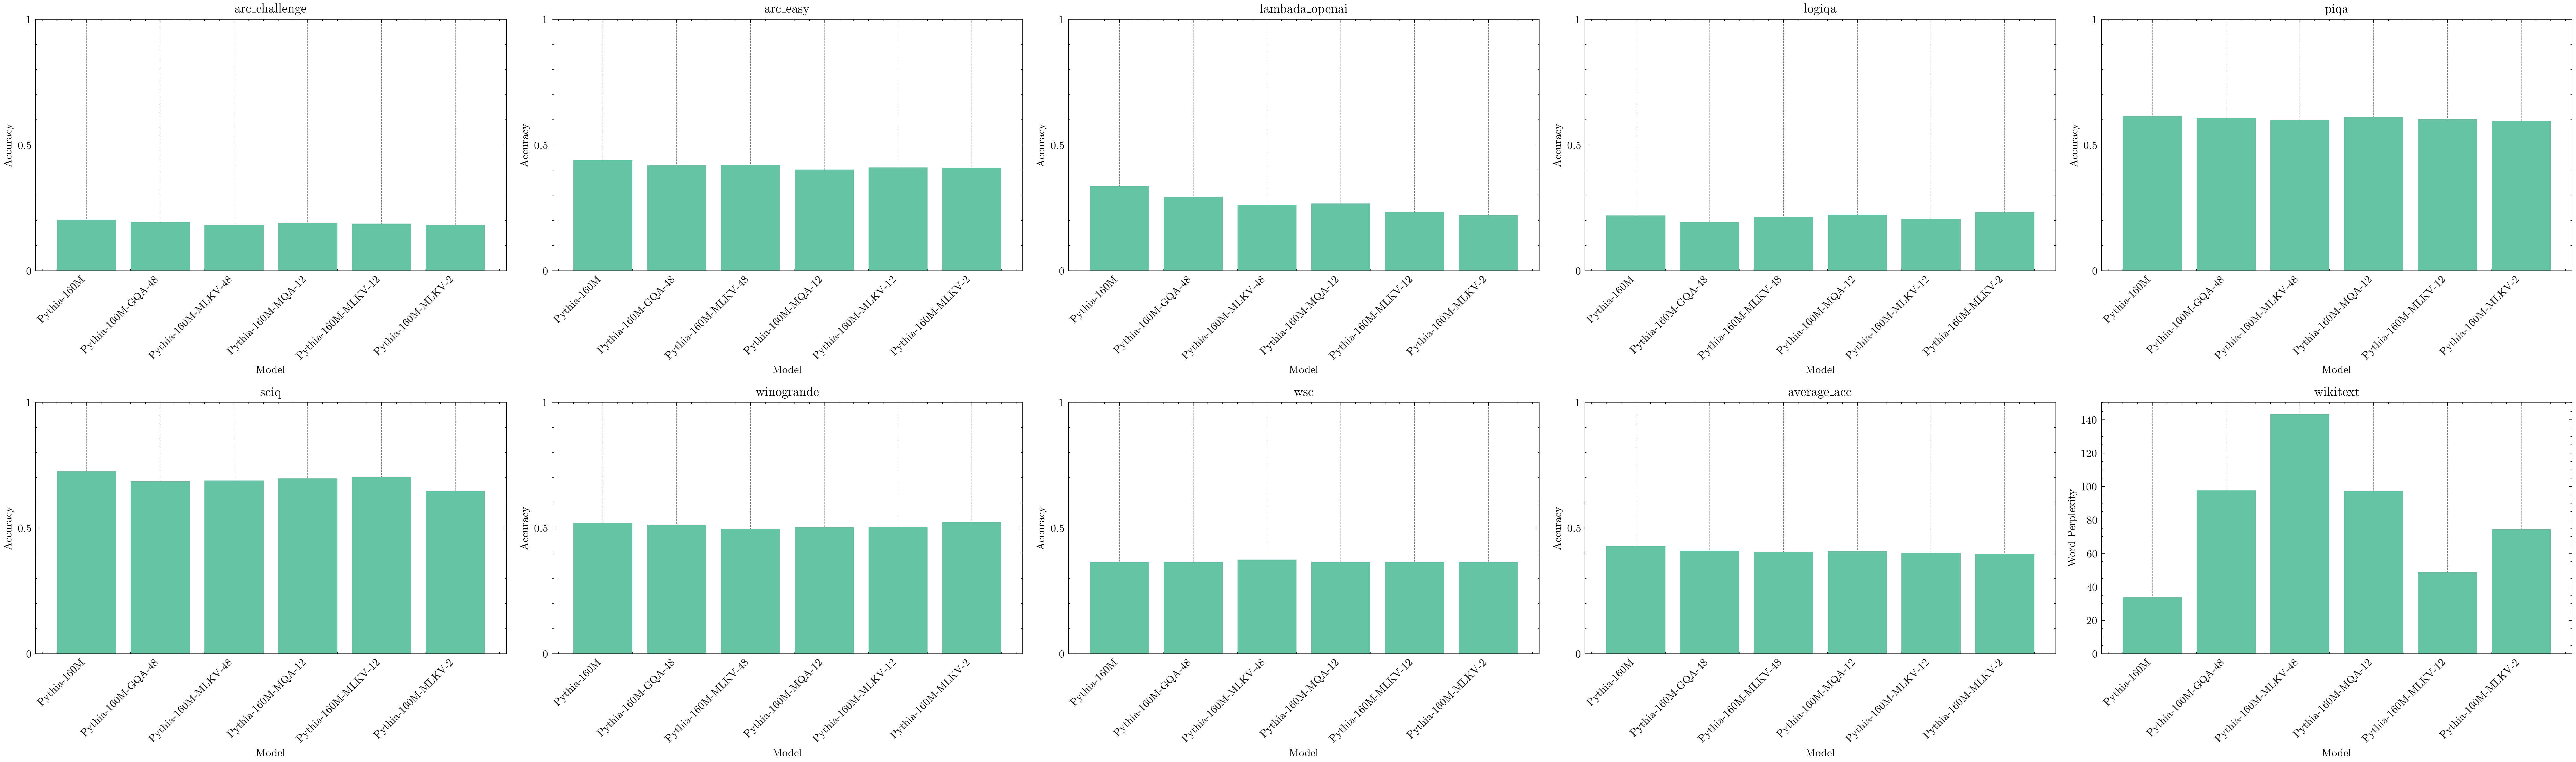

In [133]:
# Plot every benchmark
fig, ax = plt.subplots(2, 5, figsize=(width*5, height*2), dpi=300)
for i, benchmark in enumerate(eval_df.columns[1:]):
    if benchmark != 'wikitext':
        ax[i//5, i%5].bar(eval_df['model'], eval_df[benchmark])
        ax[i//5, i%5].set_title(benchmark)
        ax[i//5, i%5].set_ylim(0, 1)
        ax[i//5, i%5].set_yticks([0, 0.5, 1])
        ax[i//5, i%5].set_yticklabels([0, 0.5, 1])
        ax[i//5, i%5].set_xticklabels(eval_df['model'], rotation=45, ha="right")
        ax[i//5, i%5].grid(axis='y')
        ax[i//5, i%5].set_ylabel("Accuracy")
        ax[i//5, i%5].set_xlabel("Model")
    else:
        ax[i//5, i%5].bar(eval_df['model'], eval_df[benchmark])
        ax[i//5, i%5].set_title(benchmark)
        ax[i//5, i%5].set_xticklabels(eval_df['model'], rotation=45, ha="right")
        ax[i//5, i%5].grid(axis='y')
        ax[i//5, i%5].set_ylabel("Word Perplexity")
        ax[i//5, i%5].set_xlabel("Model")
fig.tight_layout()
# fig.savefig("lm_eval_results.png")
plt.show()

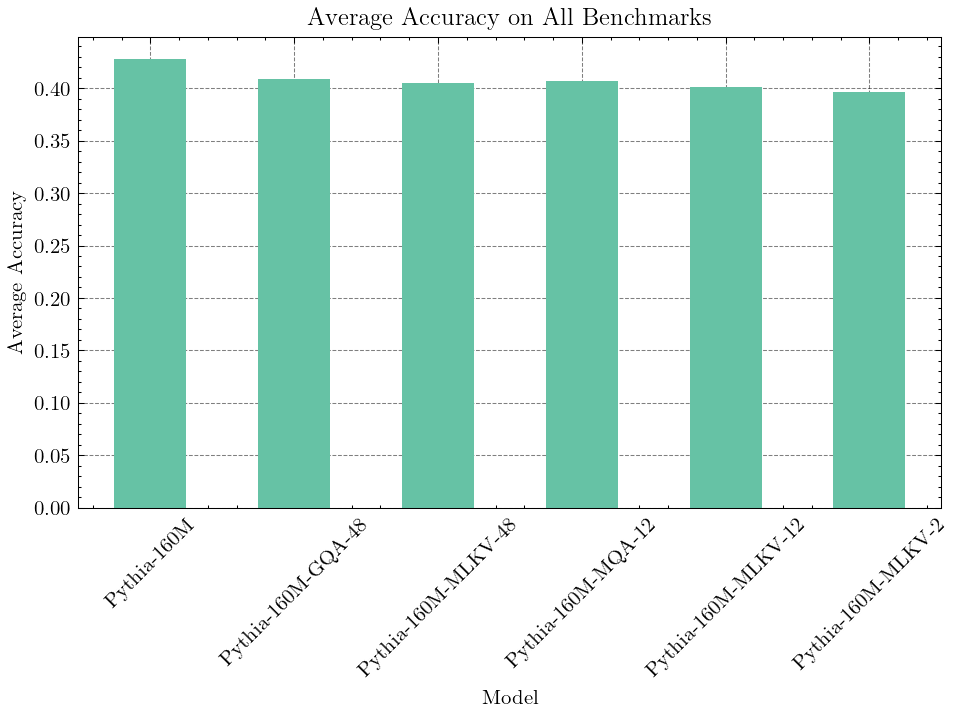

In [134]:
# Plot all accuracies and average accuracy
fig, ax = plt.subplots(figsize=(width, height), dpi=dpi)
eval_df.plot(x='model', y='average_acc', kind='bar', ax=ax, legend=False)
ax.set_ylabel('Average Accuracy')
ax.set_xlabel('Model')
ax.set_title('Average Accuracy on All Benchmarks')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('lm_eval_results.png')
plt.show()

In [135]:
# Add data on inference speed and memory measurements
measurements = pd.read_csv('measurements.csv')
measurements

,model_name,batch_size,sequence_length,memory_usage,kv_cache_mem,inference_time,inference_speed,is_oom
0,../pythia-160m-deduped,8,2048,3800,1150.875000,29.191546,280.629191,False
1,../pythia-160m-deduped,16,2048,8528,2301.750000,41.575952,394.073963,False
2,../pythia-160m-deduped,24,2048,11088,3452.625000,52.760075,465.806771,False
3,../pythia-160m-deduped,32,2048,10868,4603.500000,74.655943,438.920180,False
4,../pythia-160m-deduped,40,2048,10904,5754.375000,154.641706,264.870332,False
...,...,...,...,...,...,...,...,...
65,faridlazuarda/pythia-160m-mlkv-2-b12-g2-v1,64,2048,10874,127.875000,87.855572,745.951547,False
66,faridlazuarda/pythia-160m-mlkv-2-b12-g2-v1,72,2048,10844,143.859375,99.284953,742.589866,False
67,faridlazuarda/pythia-160m-mlkv-2-b12-g2-v1,80,2048,10882,159.843750,106.917380,766.199095,False
68,faridlazuarda/pythia-160m-mlkv-2-b12-g2-v1,88,2048,1624,0.000000,inf,0.000000,True


In [136]:
model_name_map = {
    "../pythia-160m-deduped": "Pythia-160M",
    "faridlazuarda/pythia-160m-gqa-48-b12-g2-v2": "Pythia-160M-GQA-48",
    "faridlazuarda/pythia-160m-mlkv-48-b12-g2-v9": "Pythia-160M-MLKV-48",
    "faridlazuarda/pythia-160m-mqa-12-b12-g2-v1": "Pythia-160M-MQA-12",
    "faridlazuarda/pythia-160m-mlkv-12-b12-g2-v1": "Pythia-160M-MLKV-12",
    "faridlazuarda/pythia-160m-mlkv-2-b12-g2-v1": "Pythia-160M-MLKV-2",
}

measurements['model'] = measurements['model_name'].map(model_name_map)

In [137]:
measurements

,model_name,batch_size,sequence_length,memory_usage,kv_cache_mem,inference_time,inference_speed,is_oom,model
0,../pythia-160m-deduped,8,2048,3800,1150.875000,29.191546,280.629191,False,Pythia-160M
1,../pythia-160m-deduped,16,2048,8528,2301.750000,41.575952,394.073963,False,Pythia-160M
2,../pythia-160m-deduped,24,2048,11088,3452.625000,52.760075,465.806771,False,Pythia-160M
3,../pythia-160m-deduped,32,2048,10868,4603.500000,74.655943,438.920180,False,Pythia-160M
4,../pythia-160m-deduped,40,2048,10904,5754.375000,154.641706,264.870332,False,Pythia-160M
...,...,...,...,...,...,...,...,...,...
65,faridlazuarda/pythia-160m-mlkv-2-b12-g2-v1,64,2048,10874,127.875000,87.855572,745.951547,False,Pythia-160M-MLKV-2
66,faridlazuarda/pythia-160m-mlkv-2-b12-g2-v1,72,2048,10844,143.859375,99.284953,742.589866,False,Pythia-160M-MLKV-2
67,faridlazuarda/pythia-160m-mlkv-2-b12-g2-v1,80,2048,10882,159.843750,106.917380,766.199095,False,Pythia-160M-MLKV-2
68,faridlazuarda/pythia-160m-mlkv-2-b12-g2-v1,88,2048,1624,0.000000,inf,0.000000,True,Pythia-160M-MLKV-2


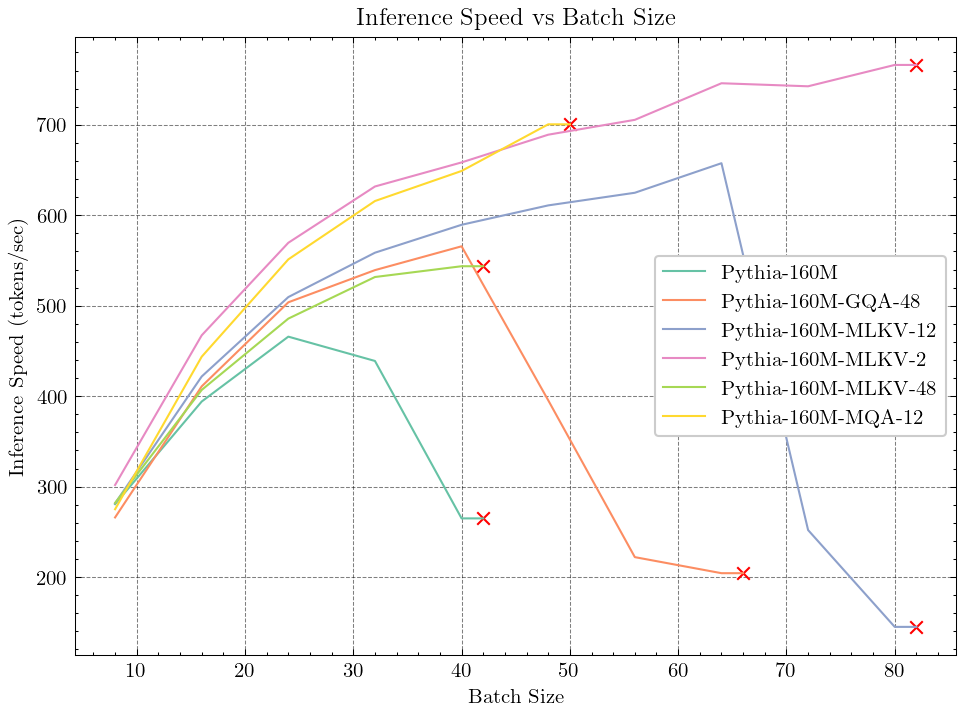

In [138]:
# We want to plot batch size on the x axis and inference speed on the y axis for every model
# We want to plot an "X" at the point where the model runs out of memory, and then stop the line there
# So maybe we need to first remove the OOM points from the data, and then add an imaginary OOM point batch_size + 8 from the last available batch size, with the same inference speed
cleaned_measurements = measurements[measurements['is_oom'] == False]
for model in model_files.keys():
    last_batch_size = cleaned_measurements[cleaned_measurements['model'] == model]['batch_size'].max()
    last_inference_speed = cleaned_measurements[(cleaned_measurements['model'] == model) & (cleaned_measurements['batch_size'] == last_batch_size)]['inference_speed'].values[0]
    cleaned_measurements = pd.concat([cleaned_measurements, pd.DataFrame({'model': [model], 'batch_size': [last_batch_size + 2], 'inference_speed': [last_inference_speed], 'is_oom': [True]})])

fig, ax = plt.subplots(figsize=(width, height), dpi=dpi)
for model, group in cleaned_measurements.groupby('model'):
    group.plot(x='batch_size', y='inference_speed', kind='line', ax=ax, label=model)
    for i, row in group.iterrows():
        if row['is_oom']:
            ax.scatter(row['batch_size'], row['inference_speed'], color='red', marker='x')
# Sort legends like in model_files
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: model_files[t[0]]))
ax.legend(handles, labels)
ax.set_ylabel('Inference Speed (tokens/sec)')
ax.set_xlabel('Batch Size')
ax.set_title('Inference Speed vs Batch Size')
plt.tight_layout()
# plt.savefig('inference_speed.png')
plt.show()

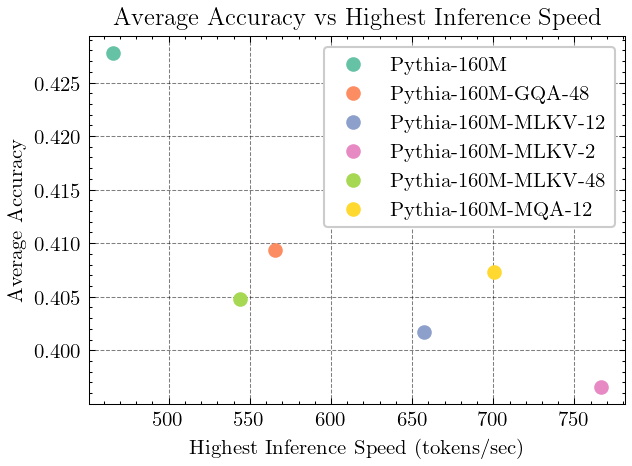

In [139]:
# Plot highest inference speed on x axis vs average accuracy on y axis
fig, ax = plt.subplots(figsize=(width/1.5, height/1.5), dpi=dpi)
for model, group in cleaned_measurements.groupby('model'):
    max_speed = group['inference_speed'].max()
    acc = eval_df[eval_df['model'] == model]['average_acc'].values[0]
    ax.scatter(max_speed, acc, label=model)
ax.legend()
ax.set_ylabel('Average Accuracy')
ax.set_xlabel('Highest Inference Speed (tokens/sec)')
ax.set_title('Average Accuracy vs Highest Inference Speed')
plt.tight_layout()
# plt.savefig('accuracy_vs_speed.png')
plt.show()